In [110]:
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

In [111]:
data= pd.read_csv("G:/NLP Project/Whatsapp_new.csv")

In [112]:
data

,Date,Numbers,Comments,Group_Name
0,2/24/2022 11:51,570127:,<Media omitted>,football
1,2/24/2022 11:54,971940:,<Media omitted>,football
2,2/24/2022 12:18,797038:,"Wueh, Putin😂🙌🏾",football
3,2/24/2022 12:20,797038:,"Experts, hii kitu ita affe t aje Africa?",football
4,2/24/2022 12:22,457432:,"Ni Kenya tu, hii kiherehere yenu lazima aizime😂😂",football
...,...,...,...,...
5940,NaN,NaN,It's sad that a young man like you is riding ...,Politics
5941,NaN,NaN,"Goodmorning SOY SOUTH WARD, OAMUNEE..",Politics
5942,NaN,NaN,Tumndo kesho,Politics
5943,NaN,NaN,Umechanga kweli,Politics


In [113]:
data.tail()

,Date,Numbers,Comments,Group_Name
5940,NaN,NaN,It's sad that a young man like you is riding ...,Politics
5941,NaN,NaN,"Goodmorning SOY SOUTH WARD, OAMUNEE..",Politics
5942,NaN,NaN,Tumndo kesho,Politics
5943,NaN,NaN,Umechanga kweli,Politics
5944,NaN,NaN,Wote ni wako ama aje mkuu,Politics


In [114]:
data= data.drop(['Date', 'Numbers'], axis=1)
data

,Comments,Group_Name
0,<Media omitted>,football
1,<Media omitted>,football
2,"Wueh, Putin😂🙌🏾",football
3,"Experts, hii kitu ita affe t aje Africa?",football
4,"Ni Kenya tu, hii kiherehere yenu lazima aizime😂😂",football
...,...,...
5940,It's sad that a young man like you is riding ...,Politics
5941,"Goodmorning SOY SOUTH WARD, OAMUNEE..",Politics
5942,Tumndo kesho,Politics
5943,Umechanga kweli,Politics


In [116]:
data['Group_Name'].value_counts()

football    5118
Politics     814
Name: Group_Name, dtype: int64

In [117]:
sentiment_label = data.Group_Name.factorize()
sentiment_label

(array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 Index(['football', 'Politics'], dtype='object'))

In [120]:
tweet = data.Comments.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [121]:
print(tokenizer.word_index)

{'the': 1, 'na': 2, 'ni': 3, 'to': 4, 'and': 5, 'a': 6, 'ya': 7, 'in': 8, 'is': 9, 'of': 10, 'you': 11, 'for': 12, 'i': 13, 'hio': 14, 'hii': 15, 'we': 16, 'but': 17, 'that': 18, 'it': 19, 'kwa': 20, 'are': 21, 'haha': 22, 'he': 23, 'tu': 24, 'this': 25, 'be': 26, 'man': 27, 'they': 28, 'season': 29, 'sana': 30, 'with': 31, 'on': 32, 'all': 33, 'time': 34, 'players': 35, 'so': 36, 'not': 37, 'kama': 38, 'team': 39, 'ata': 40, 'si': 41, 'will': 42, 'was': 43, 'from': 44, 'wewe': 45, 'have': 46, '😆': 47, 'good': 48, 'ndio': 49, 'chelsea': 50, 'lakini': 51, 'ndo': 52, 'wa': 53, '😂😂😂': 54, 'kuna': 55, 'his': 56, 'u': 57, 'watu': 58, 'bro': 59, 'or': 60, 'who': 61, 'him': 62, 'game': 63, 'as': 64, 'what': 65, 'liverpool': 66, 'yeah': 67, 'pia': 68, 'your': 69, 'city': 70, 'za': 71, 'its': 72, 'no': 73, 'like': 74, 'sawa': 75, 'huyu': 76, 'mimi': 77, 'at': 78, 'best': 79, 'has': 80, 'one': 81, 'player': 82, 'people': 83, 'ball': 84, 'ama': 85, 'kitu': 86, 'uko': 87, 'their': 88, 'bado': 89, 

In [124]:
print(tweet[200])
print(encoded_docs[200])

Haha poch ako chini sana. Hana continental pro license ata na bila hio huwezi bishana na the big boys that have completed all their courses in understanding the game.
[22, 4555, 136, 275, 30, 733, 4556, 1641, 2823, 40, 2, 311, 14, 390, 2824, 2, 1, 161, 996, 18, 46, 1642, 33, 88, 4557, 8, 4558, 1, 63]


In [125]:
print(padded_sequence[1000])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [126]:
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           371808    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 388,459
Trainable params: 388,459
Non-trainable params: 0
__________________________________________________

In [127]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
149/149 [==============================] - 22s 124ms/step - loss: 0.0726 - accuracy: 0.9960 - val_loss: 5.5680 - val_accuracy: 0.3045
Epoch 2/5
149/149 [==============================] - 18s 121ms/step - loss: 2.7374e-04 - accuracy: 1.0000 - val_loss: 6.0660 - val_accuracy: 0.3045
Epoch 3/5
149/149 [==============================] - 18s 120ms/step - loss: 1.5488e-04 - accuracy: 1.0000 - val_loss: 6.3858 - val_accuracy: 0.3045
Epoch 4/5
149/149 [==============================] - 19s 127ms/step - loss: 1.0509e-04 - accuracy: 1.0000 - val_loss: 6.6304 - val_accuracy: 0.3045
Epoch 5/5
149/149 [==============================] - 20s 132ms/step - loss: 7.7435e-05 - accuracy: 1.0000 - val_loss: 6.8329 - val_accuracy: 0.3045


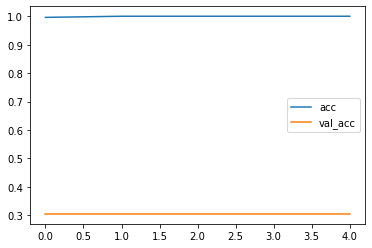

<Figure size 432x288 with 0 Axes>

In [128]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

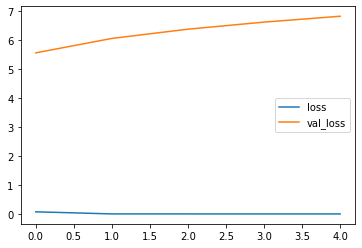

<Figure size 432x288 with 0 Axes>

In [130]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plot.jpg")

In [131]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

In [133]:
test_sentence1 = "Tunataka team ziko serious buana."
predict_sentiment(test_sentence1)

test_sentence2 = "not a bad start, keep it up mhesh"
predict_sentiment(test_sentence2)

1/1 [==============================] - 0s 34ms/step
Predicted label:  football
1/1 [==============================] - 0s 33ms/step
Predicted label:  football
